# K-Nearest-Neighbors
KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting 
of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a
function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

# Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

# Problem statement

Dataset:
The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald 
Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). 
Four features were measured from each sample: the length and the width of the sepals and petals.

Source: https://archive.ics.uci.edu/ml/datasets/Iris

Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.

# Question 1
Import libraries and load the dataset

In [115]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

df = pd.read_csv('iris.csv')
df.isna().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

# Data Pre-processing

# Question 2 - Estimating missing values
Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have 
to see how to replace those missing values with some estimated values (median)

In [116]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='median', axis=0)
imputer = imputer.fit(df.iloc[:,:-1].values)
imputed_data = imputer.transform(df.iloc[:,:-1].values)
df.iloc[:,:-1] = imputed_data

# Question 3 - Dealing with categorical data
Change all the classes to numericals (0to2).

In [123]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1.0,5.1,3.5,1.4,0.2,0
1,2.0,4.9,3.0,1.4,0.2,0
2,3.0,4.7,3.2,1.3,0.2,0
3,4.0,4.6,3.1,1.5,0.2,0
4,5.0,5.0,3.6,1.4,0.2,0


# Question 4
Observe the association of each independent variable with target variable and drop variables from feature set having correlation 
in range -0.1 to 0.1 with target variable.

In [118]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.702734,-0.392693,0.872346,0.890676,0.942753
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.942753,0.775061,-0.417318,0.944477,0.952513,1.000000


# Question 5
Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). 
They will be having almost no influence on the classification.

In [119]:
df.var()

Id               1938.000000
SepalLengthCm       0.676645
SepalWidthCm        0.185552
PetalLengthCm       3.076516
PetalWidthCm        0.577141
Species             0.675322
dtype: float64

# Question 6
Plot the scatter matrix for all the variables.

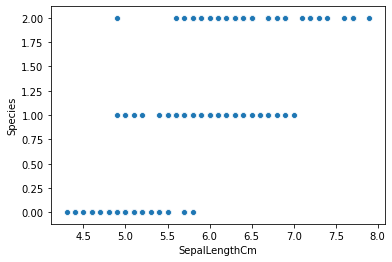

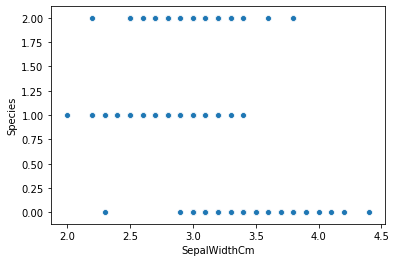

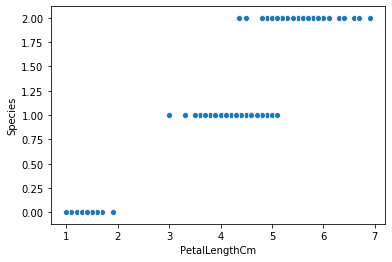

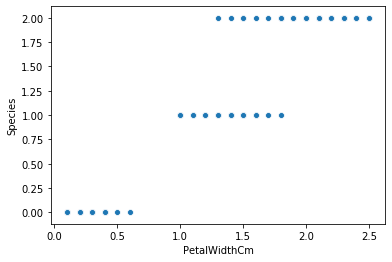

In [120]:
for col in df.columns[1:5]:
    sns.scatterplot(x = df[col], y=df['Species'])
    plt.show()

# Split the dataset into training and test sets

# Question 7
Split the dataset into training and test sets with 80-20 ratio.

In [126]:
X = np.array(df.ix[:, 1:5]) 
y = np.array(df['Species'])

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_test.shape)
print(y_test.shape)

(31, 4)
(31,)


# Question 8 - Model
Build the model and train and test on training and test sets respectively using scikit-learn. Print the Accuracy of the model with different values of k=3,5,9.

Hint: For accuracy you can check accuracy_score() in scikit-learn

In [128]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 9)
knn = KNeighborsClassifier(n_neighbors=9)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

1.0
1.0
1.0


# Question 9 - Cross Validation
Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from the above list using the Mis 
classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the 
model with lowest MSE

In [136]:
k_list = np.arange(1,20, step =2)
mse_list = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    mse = 1-accuracy
    mse_list.append(mse)
    print("MSE for {} is {}".format(k, mse))

np.min(mse_list)

MSE for 1 is 0.032258064516129004
MSE for 3 is 0.0
MSE for 5 is 0.0
MSE for 7 is 0.032258064516129004
MSE for 9 is 0.0
MSE for 11 is 0.0
MSE for 13 is 0.0
MSE for 15 is 0.0
MSE for 17 is 0.0
MSE for 19 is 0.0


0.0

# Question 10
Plot misclassification error vs k (with k value on X-axis) using matplotlib.

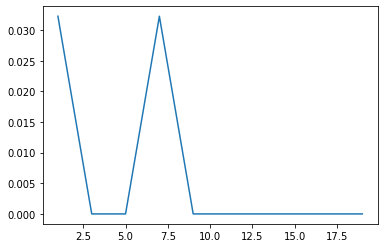

In [135]:
plt.plot(k_list, mse_list)